<a href="https://colab.research.google.com/github/Jyoti1706/tensorflow-certification/blob/main/01_Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

Regression is: predicting a number(dependent variable) with the help of independen variables

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

### Input and Output for (NNR) Neural Network Regression with TF

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


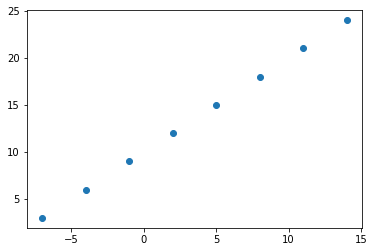

In [2]:
## Create the input feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
## Converting numpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
print(input_shape, output_shape)

() ()


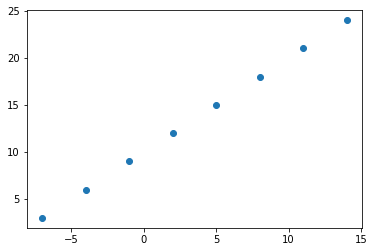

In [6]:
plt.scatter(X,y)

### Steps in modelling with tensorflow

1. **Creating a model** - Define  the input and output layers, as well as the hidden layer of deep learning.
2. **Compiling a model** - define loss function ( functions which tells model how wrong it is) and optimizer(tells model how to improve the pattern learning).
3. **Fitting a model** - letting the modeltry to find pattern between X & y (features and labels
4. **Evaluate model** - on testing data

### params defination

1. **Compiling a model**

- Loss function --> our model use to improve its performance.

- Metrics --> it's for humans to check our performance of your model.

2. **fit a model**

- Epocs -->how many time model will go through the training example


In [7]:
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
# Check out X and y
print(X, y)
# Make a prediction with the model
model.predict([17.0])

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


array([[12.716021]], dtype=float32)

## Imporving Model

we can improve model at various stages

1. while **creating a models**: 
  - we can add more layers, hidden layers, we can increase number of neurons in each layer.   
  - within each layer change activation function.


2. while **Compiling a model** - 
  - change optimization function 
  - change learmning rate of optimization function

3. while **fitting the model**
  - fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

In [9]:
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 235ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 

In [10]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [12]:
# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=None),
  #tf.keras.layers.Dense(100, activation="relu"),
  #tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 372ms/step - loss: 14.6302 - mae: 14.6302
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1254 - mae: 14.1254
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6253 - mae: 13.6253
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1272 - mae: 13.1272
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6286 - mae: 12.6286
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1269 - mae: 12.1269
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6195 - mae: 11.6195
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1037 - mae: 11.1037
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5770 - mae: 10.5770
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0366 - mae: 10.0366
Epoch 11/100
1/1 [==============================] - 0

In [13]:
model.predict([17.0])

array([[29.664333]], dtype=float32)

In [14]:
# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 13.0060 - mae: 13.0060
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 12.9709 - mae: 12.9709
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9357 - mae: 12.9357
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9006 - mae: 12.9006
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8674 - mae: 12.8674
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8345 - mae: 12.8345
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8017 - mae: 12.8017
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7690 - mae: 12.7690
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.7366 - mae: 12.7366
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7044 - mae: 12.7044
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss

In [15]:
model.predict([17.0])

array([[12.539059]], dtype=float32)

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.




In [16]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)

y = X + 10
X, y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

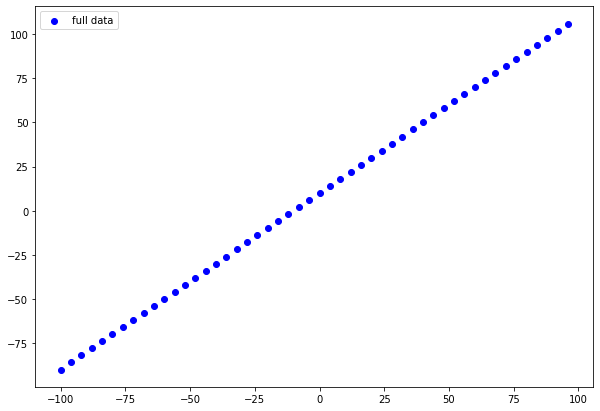

In [17]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X, y, c='b', label='full data')

plt.legend();

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [18]:
# Check how many samples we have
len(X)

50

In [19]:
X_train = X[:40]  #(80% of data)
y_train = y[:40]
X_test = X[40:]  #(20% of data)
y_test = y[40:]

## Visualizing the data

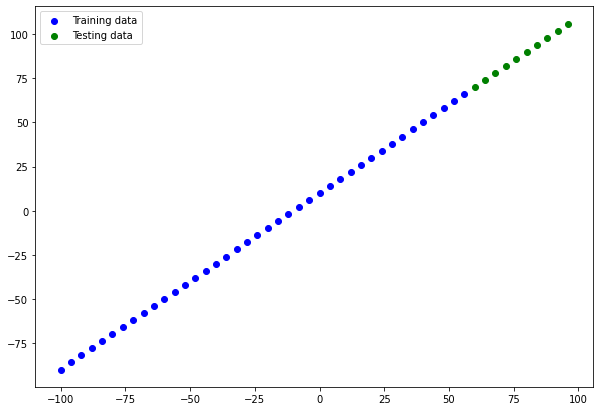

In [20]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

#; after legend helps to remove <matplotlib.legend.Legend at 0x7f8d619d7f50>

In [21]:
# Create
model= tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)
# Compile
model.compile(loss = tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# # Fit
# model.fit(X_train, y_train, epochs = 100)

In [22]:
model.build(input_shape=(1,1))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (1, 1)                    2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Create Model with input_shape , Input_shape is a tuple with input and output

Dense = fully Connected layer

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=[1])]
)
# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.



In [45]:
# Create a model (same as above)
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(3, input_shape=[1])]
)
# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=["mae"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [46]:
model.fit(X_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 42.2749 - mae: 42.2749
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 41.1113 - mae: 41.1113
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 39.8732 - mae: 39.8732
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 38.6884 - mae: 38.6884
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 37.4957 - mae: 37.4957
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 36.3756 - mae: 36.3756
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 35.2662 - mae: 35.2662
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 34.0741 - mae: 34.0741
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 32.7285 - mae: 32.7285
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 31.5174 - mae: 31.5174
Epoch 11/100
2/2 [==============================] - 0s 5ms/

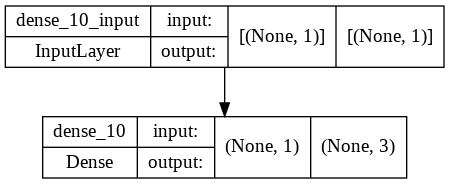

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [40]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(10, input_shape=[1], name = "Input_Layer"),
     tf.keras.layers.Dense(1, name = "Output_layer")],
     name = "Base_Model"
)
# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "Base_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


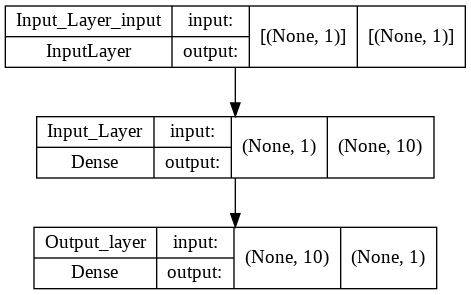

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [65]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(10, input_shape=[1], name = "Input_Layer"),
     tf.keras.layers.Dense(1, name = "Output_layer")],
     name = "Base_Model"
)
# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=["mae"])
model.summary()

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=150) # train for 100 epochs not 10

Model: "Base_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
2/2 [==============================] - 0s 8ms/step - loss: 31.4825 - mae: 31.4825
Epoch 2/150
2/2 [==============================] - 0s 6ms/step - loss: 27.9390 - mae: 27.9390
Epoch 3/150
2/2 [==============================] - 0s 5ms/step - loss: 24.8349 - mae: 24.8349
Epoch 4/150
2/2 [==============================] - 0s 6ms/step - loss: 21.5009 - mae: 21.5009
Epoch 5/150
2/2 [==============================] - 0s 6ms/step - loss: 18.1487 -

In [89]:
y_pred = model.predict(X_test)
y_pred

array([[ 69.80542 ],
       [ 73.79359 ],
       [ 77.781746],
       [ 81.769905],
       [ 85.75807 ],
       [ 89.74623 ],
       [ 93.7344  ],
       [ 97.72256 ],
       [101.71073 ],
       [105.69888 ]], dtype=float32)

In [63]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data= X_test, test_label = y_test, predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_label, c="g", label="Test Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();


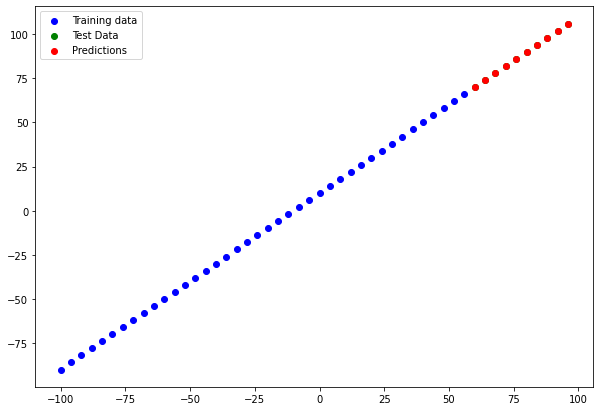

In [80]:
#added no. of epochs, changed optimizer and added learning rate as 0.005
plot_predictions(train_data = X_train, train_labels = y_train, test_data= X_test, test_label = y_test, predictions = y_pred)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
* **Huber** : combination of MSE and MAE, less sensitive towards outlier data than MSE

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [69]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 110ms/step - loss: 0.2478 - mae: 0.2478


[0.24784699082374573, 0.24784699082374573]

In [71]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.19458 , 14.965131, 12.530952, 10.892038, 10.048386, 10.      ,
       10.74688 , 12.289022, 14.626439, 17.759106], dtype=float32)>

In [90]:
y_test, y_pred
# both are in different dimensions so changed to same dimention and converted to tensor to get correct mae

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 array([[ 69.80542 ],
        [ 73.79359 ],
        [ 77.781746],
        [ 81.769905],
        [ 85.75807 ],
        [ 89.74623 ],
        [ 93.7344  ],
        [ 97.72256 ],
        [101.71073 ],
        [105.69888 ]], dtype=float32))

In [91]:
y_test = tf.constant(y_test)

In [92]:
y_pred = tf.squeeze(y_pred)

In [93]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.80542 ,  73.79359 ,  77.781746,  81.769905,  85.75807 ,
         89.74623 ,  93.7344  ,  97.72256 , 101.71073 , 105.69888 ],
       dtype=float32)>)

In [87]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.24784699>

In [94]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.062584095>

In [97]:
h = tf.keras.losses.Huber()
h(y_test, y_pred).numpy()

0.031292047

In [149]:
def mae(y_true, y_pred):
  mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
  return mae.numpy()

def mse(y_true, y_pred):
  mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred)
  return mse.numpy()

def huber_metric(y_true, y_pred):
  h = tf.keras.losses.Huber()
  return h(y_true, y_pred).numpy()
  



## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [112]:
X_train = X[:40]  #(80% of data)
y_train = y[:40]
X_test = X[40:]  #(20% of data)
y_test = y[40:]

In [115]:
tf.random.set_seed=42
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
#model_1.fit(X_train, y_train)
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 26.4821 - mae: 26.4821
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5605 - mae: 8.5605
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 10.7800 - mae: 10.7800
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2395 - mae: 11.2395
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4704 - mae: 12.4704
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6435 - mae: 9.6435
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 8.7477 - mae: 8.7477
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0532 - mae: 9.0532
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.2073 - mae: 19.2073
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3632 - mae: 10.3632
Epoch 11/100
2/2 [==============================] - 0s 10ms/step

In [116]:
pred_1 = model_1.predict(X_test)

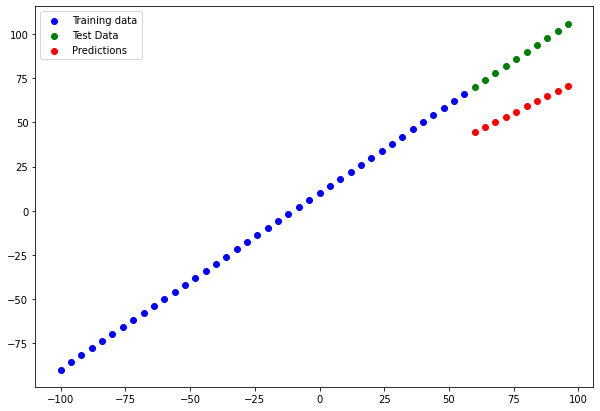

In [118]:
plot_predictions(predictions = pred_1)

In [124]:
mae_1 = mae(y_test, tf.squeeze(pred_1)).numpy()
mse_1 = mse(y_test, tf.squeeze(pred_1)).numpy()
huber_1 = huber_metric(y_test, tf.squeeze(pred_1))
print(mae_1,mse_1,huber_1)

tf.Tensor(30.403025, shape=(), dtype=float32) tf.Tensor(934.5885, shape=(), dtype=float32) 29.903025


#### Model 2: 2 dense layer, 100 epochs, sgd optimizer

In [125]:
tf.random.set_seed=42
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
#model_1.fit(X_train, y_train)
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 36.1963 - mae: 36.1963
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.8390 - mae: 21.8390
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 27.1286 - mae: 27.1286
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.8314 - mae: 13.8314
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.4095 - mae: 15.4095
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2389 - mae: 12.2389
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.5485 - mae: 11.5485
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2387 - mae: 11.2387
Epoch 9/100
2/2 [==============================] - 0s 38ms/step - loss: 42.3816 - mae: 42.3816
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 29.5347 - mae: 29.5347
Epoch 11/100
2/2 [==============================] - 0s 8

In [127]:
pred_2 = model_2.predict(X_test)

In [143]:
mae_2 = mae(y_test, tf.squeeze(pred_2)).numpy()
mse_2 = mse(y_test, tf.squeeze(pred_2)).numpy()
huber_2 = huber_metric(y_test, tf.squeeze(pred_2))
print(mae_1,mse_1,huber_1)
print(mae_2,mse_2,huber_2)

tf.Tensor(30.403025, shape=(), dtype=float32) tf.Tensor(934.5885, shape=(), dtype=float32) 29.903025
10.144222 110.23521 9.644222


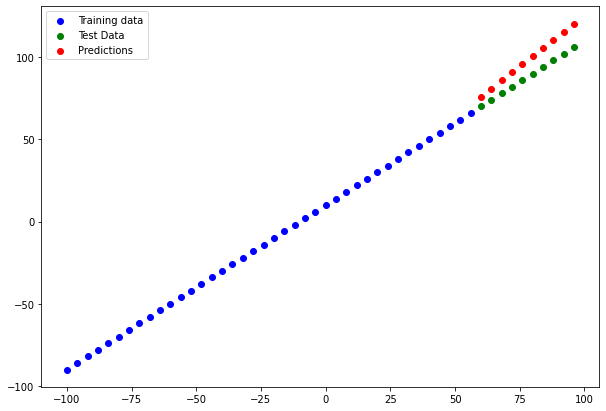

In [130]:
plot_predictions(predictions = pred_2)

#### Model 3: Change 100 to 500 echo

In [135]:
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
model_3.compile(loss= tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.SGD(),
                           metrics = ["mae"])
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 22.7616 - mae: 22.7616
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 23.4134 - mae: 23.4134
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 28.4403 - mae: 28.4403
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 16.2198 - mae: 16.2198
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 18.7100 - mae: 18.7100
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 14.7091 - mae: 14.7091
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 10.3925 - mae: 10.3925
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 12.0537 - mae: 12.0537
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 37.6383 - mae: 37.6383
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.2839 - mae: 25.2839
Epoch 11/500
2/2 [==============================] - 0s 6ms/

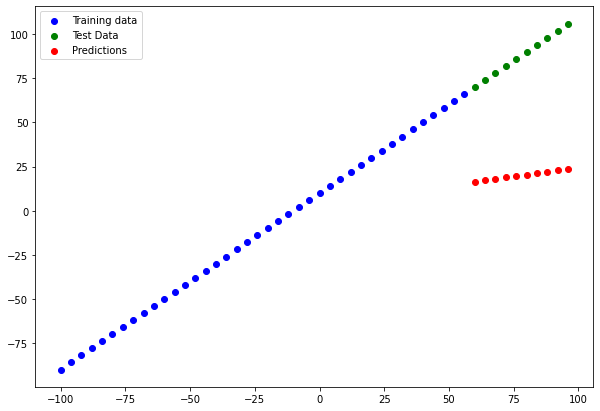

In [136]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [145]:
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
huber_3 = huber_metric(y_test, tf.squeeze(y_preds_3))
print(mae_1,mse_1,huber_1)
print(mae_2,mse_2,huber_2)
print(mae_3,mse_3,huber_3)

tf.Tensor(30.403025, shape=(), dtype=float32) tf.Tensor(934.5885, shape=(), dtype=float32) 29.903025
10.144222 110.23521 9.644222
67.9668 4703.9014 67.4668


In [146]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy(), huber_1],
                 ["model_2", mae_2, mse_2, huber_2],
                 ["model_3", mae_3, mae_3, huber_3]]

In [148]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse","huber"])
all_results

,model,mae,mse,huber
0,model_1,30.403025,934.588501,29.903025
1,model_2,10.144222,110.235207,9.644222
2,model_3,67.966797,67.966797,67.466797
